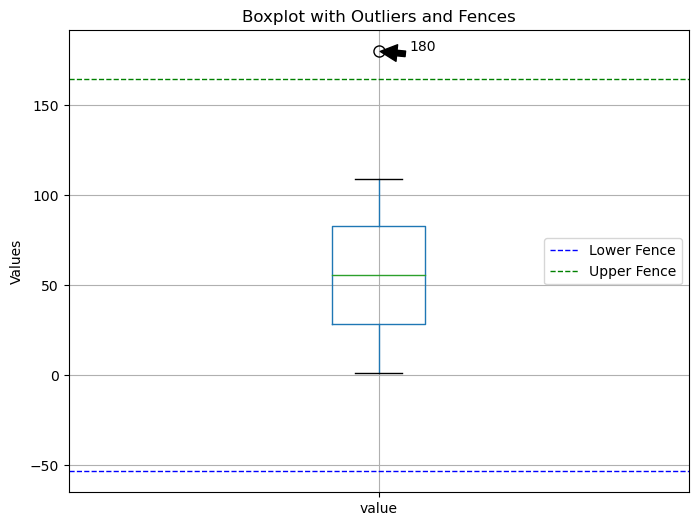

Outlier qiymətləri:
     value
109    180
Aşağı hədd: -53.5
Yuxarı hədd: 164.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Məlumatları hazırlayırıq
data = np.append(np.arange(1, 110), 180)
df = pd.DataFrame(data=data, columns=['value'])

# Boxplot-u yaradırıq
fig, ax = plt.subplots(figsize=(8, 6))

# Boxplot-un xüsusiyyətlərini təyin edirik
flierprops = dict(marker='o', color='red', markersize=8, linestyle='none')
df.boxplot(column='value', ax=ax, flierprops=flierprops)

# Q1, Q3 və IQR-i hesablamaq
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Fence-ləri hesablamaq
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Outlier qiymətlərini tapmaq
outliers = df[(df['value'] < lower_fence) | (df['value'] > upper_fence)]

# Lower və upper fence-ləri göstərmək
ax.axhline(lower_fence, color='blue', linestyle='--', linewidth=1, label='Lower Fence')
ax.axhline(upper_fence, color='green', linestyle='--', linewidth=1, label='Upper Fence')

# Outlier-ləri göstərmək
for i, outlier in outliers.iterrows():
    ax.annotate(outlier['value'], xy=(1, outlier['value']), xytext=(1.05, outlier['value']),
                arrowprops=dict(facecolor='black', shrink=0.05))

# Əfsanə və başlıq əlavə etmək
plt.legend()
plt.title('Boxplot with Outliers and Fences')
plt.ylabel('Values')

# Qrafiki göstərmək
plt.show()

# Outlier qiymətlərini çap edirik
print("Outlier qiymətləri:")
print(outliers)

print("Aşağı hədd:", lower_fence)
print("Yuxarı hədd:", upper_fence)
